# #Task 3 - Unsupervised Machine Learning

# Clustering
In this clustering task we predict the optimum number of clusters and represent it visually for the given dataset 'iris'.

In [27]:
#importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#Reading the dataset
df=pd.read_csv('Iris.csv')

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Description about the data

In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Visualization

Scattered plot of SepalLengthCm versus Petal Length where the points are colored by the Species column

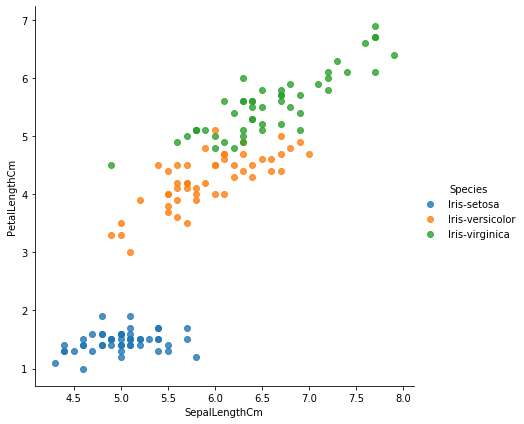

In [33]:
sns.lmplot('SepalLengthCm','PetalLengthCm',data=df, hue='Species',size=6,aspect=1,fit_reg=False)

Creating a stacked histogram showing Petal Length based on the Species column

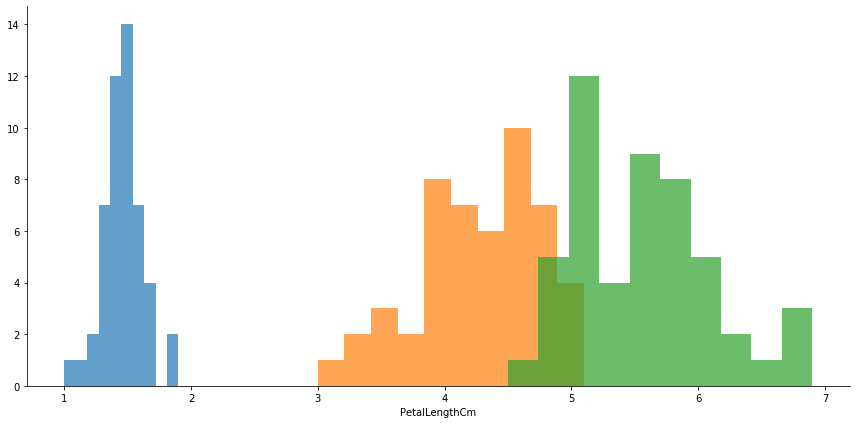

In [35]:
g = sns.FacetGrid(df,hue="Species",size=6,aspect=2)
g = g.map(plt.hist,'PetalLengthCm',alpha=0.7)

# Finding the optimum number of clusters for k-means classification

In [12]:
df.drop(['Id','Species'],axis=1,inplace=True)
x=df.values

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the result in the form of Elbow Graph

Text(0, 0.5, 'WCSS')

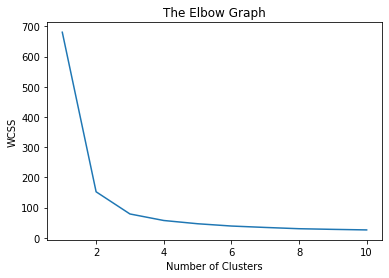

In [19]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Here we can see "The Elbow Effect' taking place, from the above graph, we can conclude the valuse of 'k', we choose the k value at which the WCSS decreases abruptly.

From this we take the number of clusters as 3

In [20]:
#Center of Clusters
kmeans.cluster_centers_

array([[4.69      , 3.085     , 1.385     , 0.19      ],
       [6.45263158, 2.94210526, 4.59473684, 1.43157895],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [5.625     , 2.54166667, 3.86666667, 1.15833333],
       [5.10909091, 3.50909091, 1.53181818, 0.28181818],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [5.64615385, 2.84615385, 4.3       , 1.37692308]])

In [21]:
#lables
kmeans.labels_

array([5, 0, 0, 0, 5, 8, 0, 5, 0, 0, 8, 5, 0, 0, 8, 8, 8, 5, 8, 5, 5, 5,
       0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 8, 8, 0, 0, 5, 0, 0, 5, 5, 0, 0, 5,
       5, 0, 5, 0, 5, 5, 1, 1, 1, 4, 1, 9, 1, 3, 1, 4, 3, 9, 4, 1, 4, 1,
       9, 4, 1, 4, 6, 9, 6, 1, 1, 1, 1, 1, 9, 4, 4, 4, 4, 6, 9, 1, 1, 1,
       9, 4, 9, 1, 4, 3, 9, 9, 9, 1, 3, 9, 2, 6, 2, 2, 2, 7, 9, 7, 2, 7,
       2, 6, 2, 6, 6, 2, 2, 7, 7, 6, 2, 6, 7, 6, 2, 7, 6, 6, 2, 2, 7, 7,
       2, 6, 6, 7, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 6], dtype=int32)

# Applying Kmeans to dataset

In [22]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=101)
kmeans.fit(x)
y_means=kmeans.fit_predict(x)

## Visualizing the Clusters

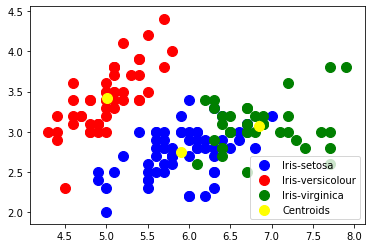

In [39]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Centroid of the Cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()